## Compute expected loss of energy in Lagrangian perspective

In [1]:
import xarray as xr
import numpy as np

from scipy import stats, fft

import matplotlib.pyplot as plt

import os
from glob import glob
import threading

import dask.dataframe as dd
from dask import delayed
import pandas as pd
import scipy.optimize
#import mitequinox.sigp as sp

%matplotlib inline
from matplotlib import pyplot as plt
#import matplotlib.animation as anima

from inspect import signature
import scipy

In [2]:
root_path = '/Users/zcaspar/codes/mit4320/'

ds_low_dl1 = xr.merge([xr.open_dataset(root_path+'energy_SSU_low_binned_dl1.0.nc'),
                   xr.open_dataset(root_path+'energy_SSV_low_binned_dl1.0.nc')])

ds_low_var_dl1 = xr.merge([xr.open_dataset(root_path+'energy_SSU_low_variance_binned_dl1.0.nc'),
                   xr.open_dataset(root_path+'energy_SSV_low_variance_binned_dl1.0.nc')])

ds_low_dl2 = xr.merge([xr.open_dataset(root_path+'energy_SSU_low_binned_dl2.0.nc'),
                   xr.open_dataset(root_path+'energy_SSV_low_binned_dl2.0.nc')])

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111,**kwargs):
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y='lat_bin',ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,**kwargs,
           cbar_kwargs={'fraction':0.02})
    ax.gridlines(draw_labels=True)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    return fig,ax

In [7]:
ds_low = ds_low_dl1.where(ds_low_dl1.waterdepth>500)
ds_low_var = ds_low_var_dl1.where(ds_low_var_dl1.waterdepth>500)

Text(0.5, 1.0, 'Lagrangian over Eulerian low frequency energy ratio')

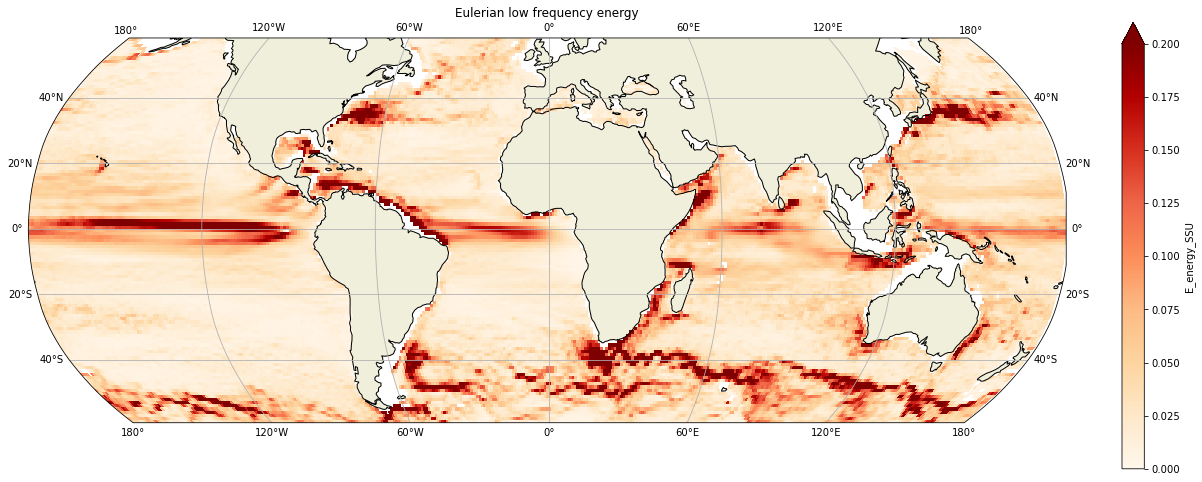

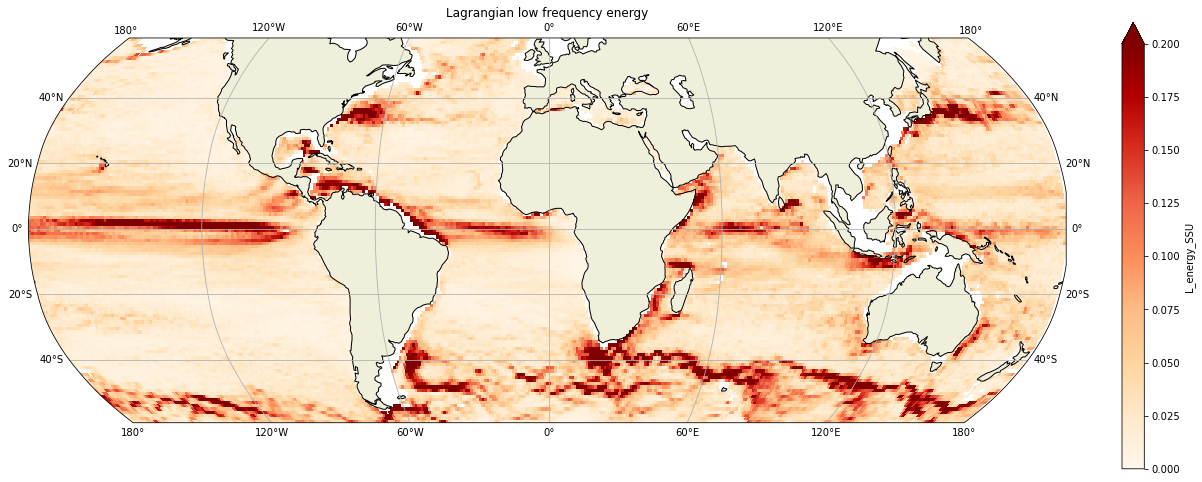

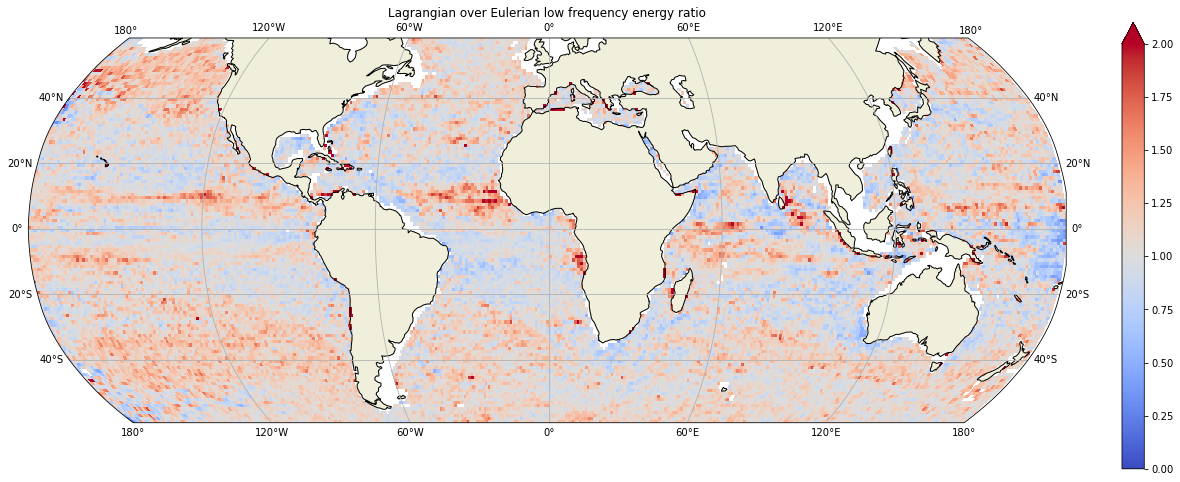

In [8]:
figsize = (20,20)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.E_energy_SSU,colmap=cmap,vlim=(0,0.2))
ax.set_title(r'Eulerian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.L_energy_SSU,colmap=cmap,vlim=(0,0.2))
ax.set_title(r'Lagrangian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.L_energy_SSU/ds_low.E_energy_SSU,colmap='coolwarm',vlim=(0,2))
ax.set_title(r'Lagrangian over Eulerian low frequency energy ratio')

Text(0.5, 1.0, 'Number of drifters per bin')

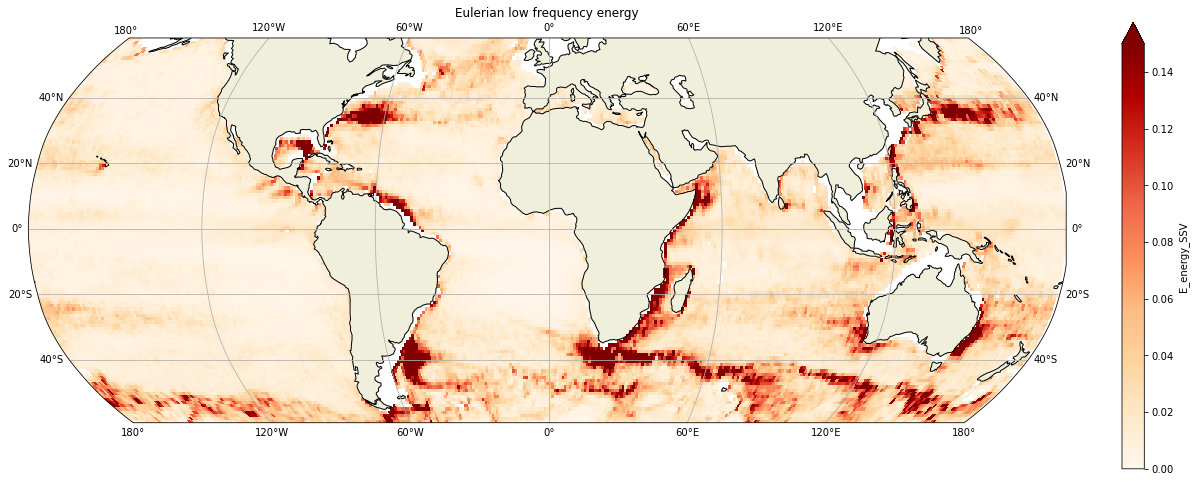

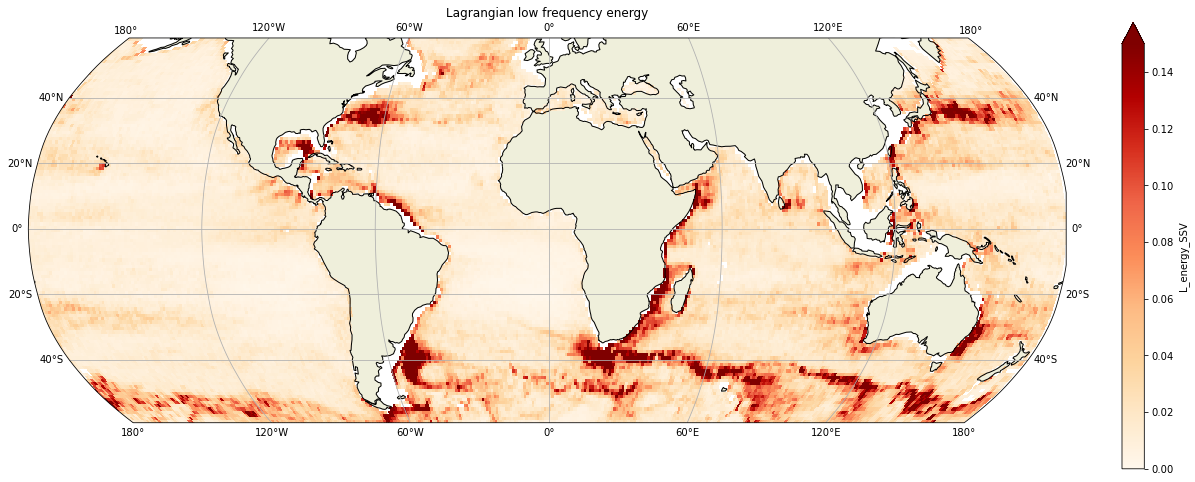

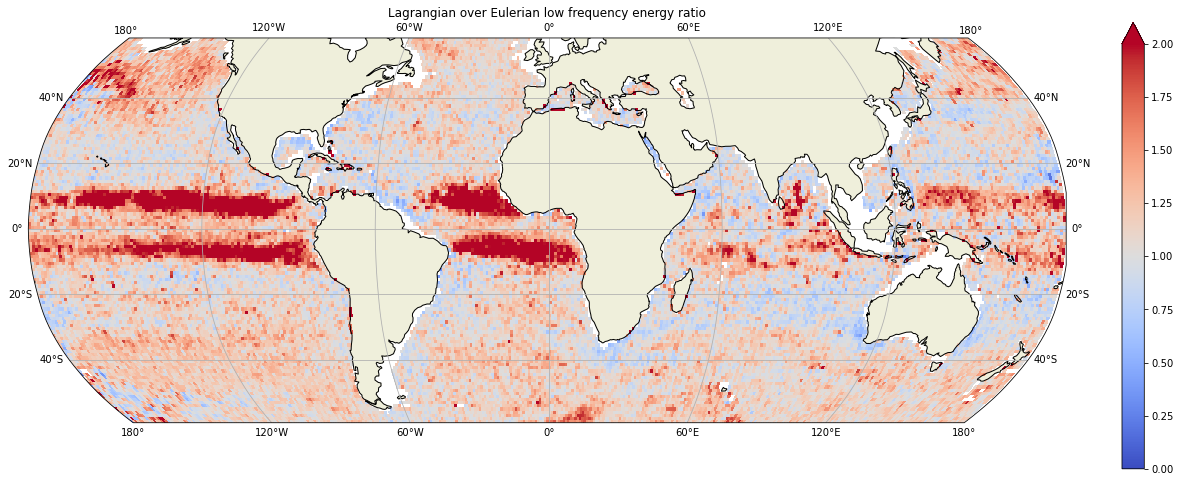

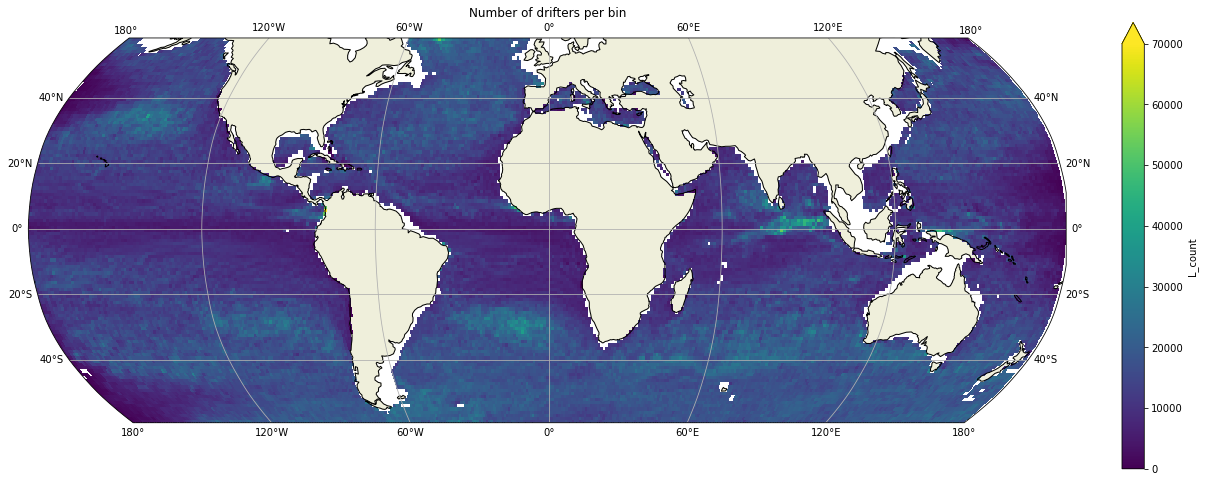

In [19]:
figsize = (20,20)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.E_energy_SSV,colmap=cmap,vlim=(0,0.15))
ax.set_title(r'Eulerian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.L_energy_SSV,colmap=cmap,vlim=(0,0.15))
ax.set_title(r'Lagrangian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.L_energy_SSV/ds_low.E_energy_SSV,colmap='coolwarm',vlim=(0.,2))
ax.set_title(r'Lagrangian over Eulerian low frequency energy ratio')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low.L_count,colmap='viridis',vlim=(0.,70000))
ax.set_title(r'Number of drifters per bin')

### Variance

Text(0.5, 1.0, 'Lagrangian over Eulerian low frequency energy ratio')

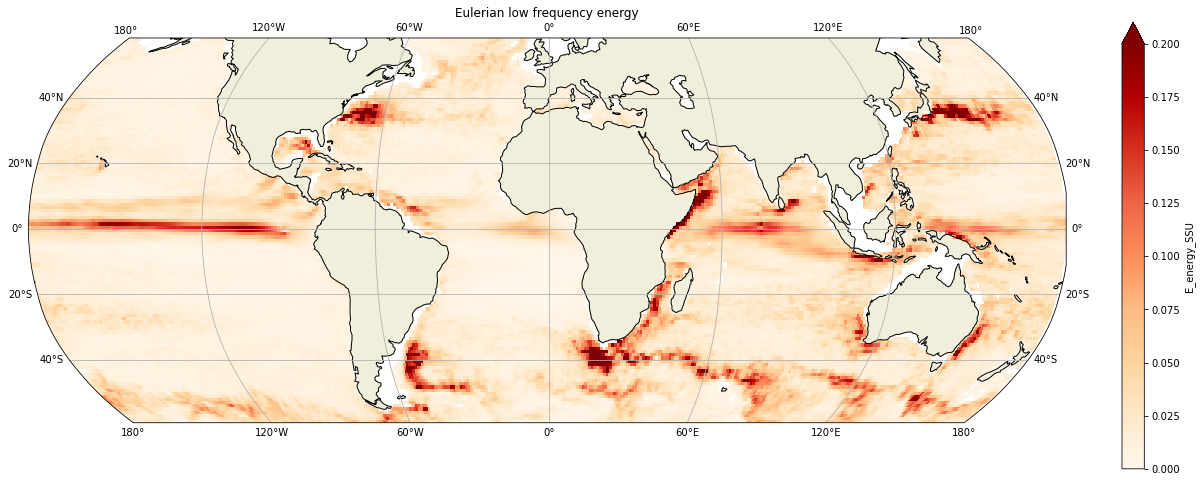

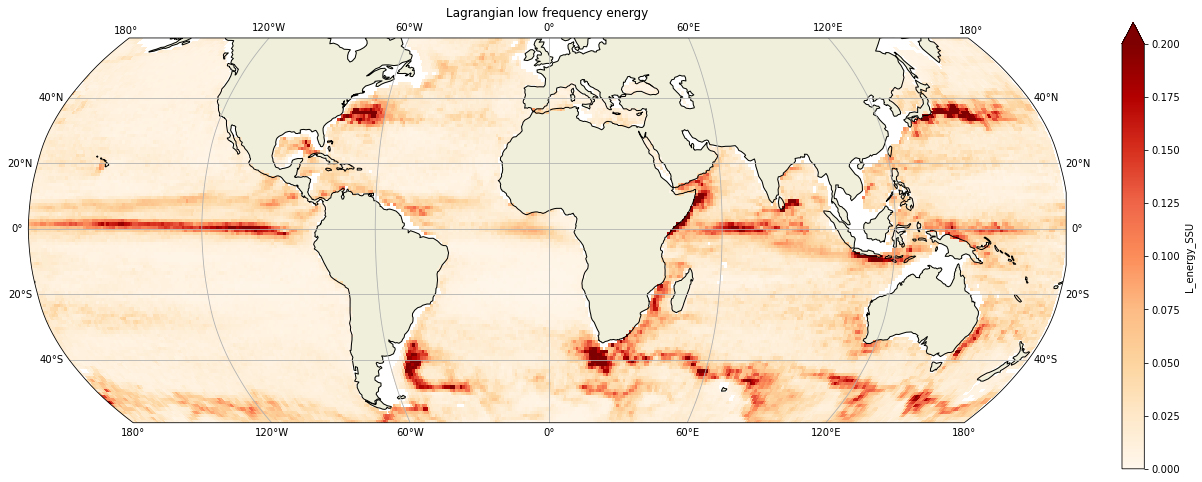

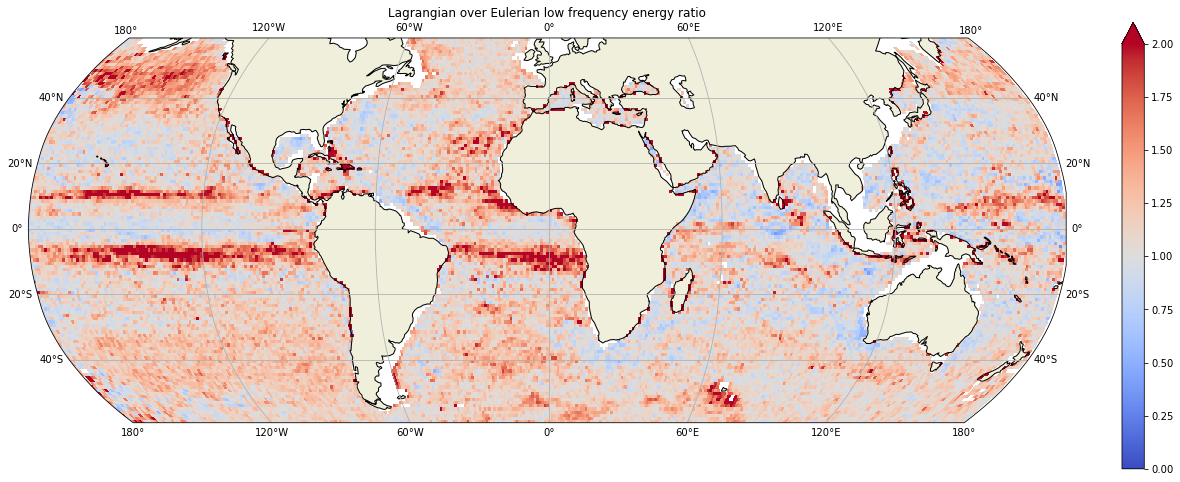

In [11]:
figsize = (20,20)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_var.E_energy_SSU,colmap=cmap,vlim=(0,0.2))
ax.set_title(r'Eulerian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_var.L_energy_SSU,colmap=cmap,vlim=(0,0.2))
ax.set_title(r'Lagrangian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_var.L_energy_SSU/ds_low_var.E_energy_SSU,colmap='coolwarm',vlim=(0,2))
ax.set_title(r'Lagrangian over Eulerian low frequency energy ratio')

Text(0.5, 1.0, 'Lagrangian over Eulerian low frequency energy ratio')

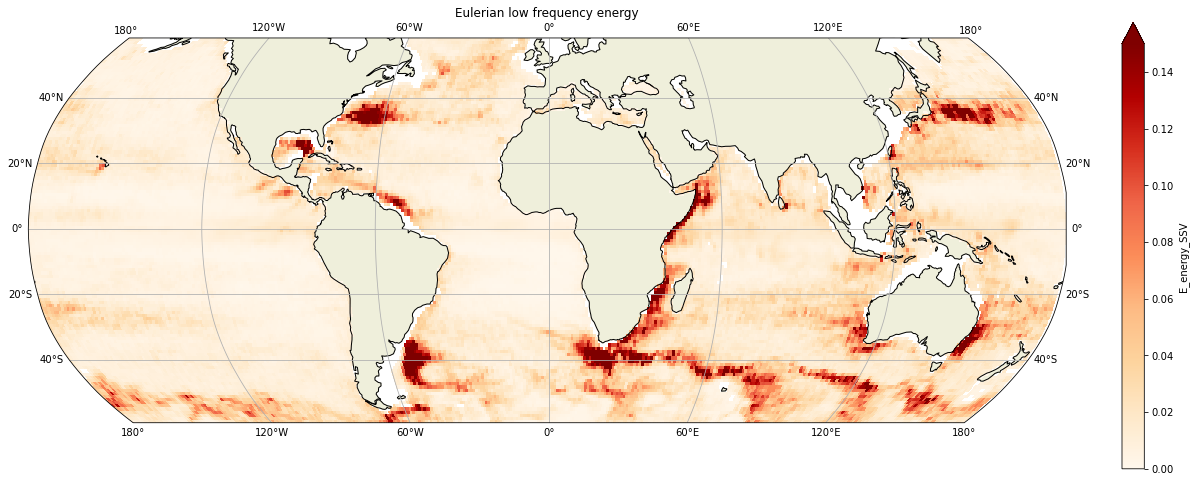

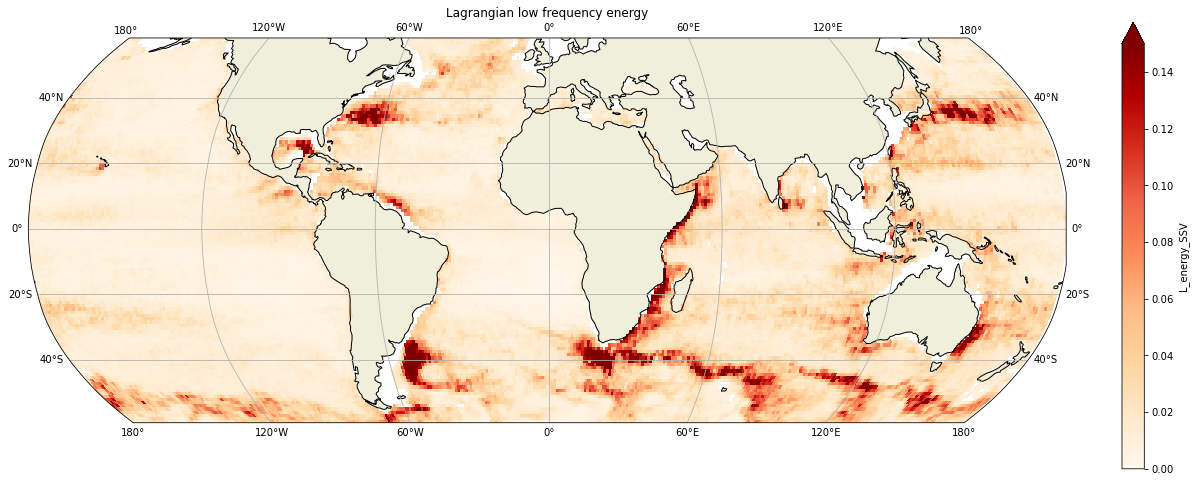

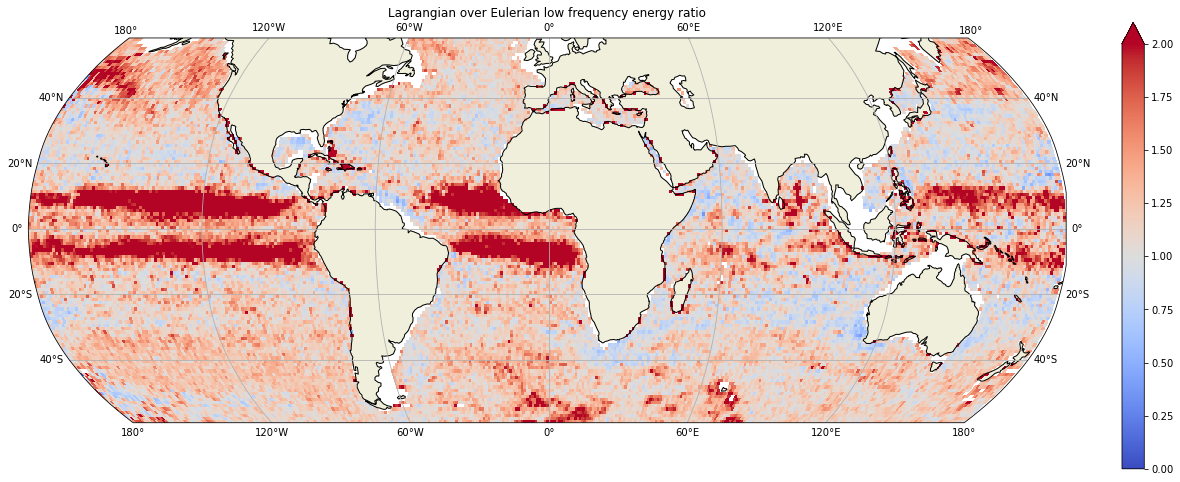

In [12]:
figsize = (20,20)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_var.E_energy_SSV,colmap=cmap,vlim=(0,0.15))
ax.set_title(r'Eulerian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_var.L_energy_SSV,colmap=cmap,vlim=(0,0.15))
ax.set_title(r'Lagrangian low frequency energy')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_var.L_energy_SSV/ds_low_var.E_energy_SSV,colmap='coolwarm',vlim=(0.,2))
ax.set_title(r'Lagrangian over Eulerian low frequency energy ratio')